# COGS 108 - EDA Checkpoint


## Names

- Rylan Keolanui
- Lauren Himpelmann
- Jasmine Shafie
- Maxim Kondrashuk
- Ozzie Orozco

## Research Question

Is there a relationship between the increase in mass shootings in the United States from 1990 to 2016 and the unemployment rates in the cities and counties in which the mass shootings took place?

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
ms = pd.read_csv('Mass_shooting.csv')

In [3]:
ms2 = pd.read_csv('shootings3.csv')

In [4]:
unemployment_rates = pd.read_csv('unemployment.csv')

In [5]:
usunemployment = pd.read_csv('https://raw.githubusercontent.com/maximk-8/cogs108_data/main/unemplymentdata.csv')

# Data Cleaning

In [6]:
#clean mass shooting datas
ms = ms.drop(columns = ['Incident ID','Address', 'Operations'])
#extract year to be in a separate column
ms['Year'] = pd.to_datetime(ms['Incident Date']).dt.year
#rename columns to match other half of dataset
ms = ms.rename(columns = {'Incident Date':'Date','# Killed':'Fatalities', '# Injured': 'Injured', 'City Or County': 'City/County'})

In [7]:
#other half of the mass shooting data set
cleanedmass = ms2.drop(columns = ['S#', 'Summary', 'Mental Health Issues', 'Race', 'Gender', 'Latitude', 'Longitude', 'Total victims'])
cleanedmass = cleanedmass.drop(columns = ['Title'])
cleanedmass['Year'] = pd.to_datetime(cleanedmass['Date']).dt.year
cleanedmass.head()

,Location,Date,Fatalities,Injured,Year
0,"Las Vegas, Nevada",10/1/2017,58,515,2017
1,"San Francisco, California",6/14/2017,3,2,2017
2,"Tunkhannock, Pennsylvania",6/7/2017,3,0,2017
3,"Orlando, Florida",6/5/2017,5,0,2017
4,"Kirkersville, Ohio",5/12/2017,3,0,2017


In [8]:
cities = []
states = []

#separate the city and state from one another in the dataset
def standardize_location(string):
    
    for i in string:
        arr = i.split(',')
        try: 
            city = arr[0]
            state = arr[1]
        except: 
            city = np.nan
            state = np.nan
        cities.append(city)
        states.append(state)
    
    

In [9]:
location = cleanedmass['Location'].tolist()
standardize_location(location)

In [10]:
cleanedmass['City/County'] = cities
cleanedmass['State'] = states

In [11]:
cleanedmass = cleanedmass[['Date','State', 'City/County', 'Fatalities', 'Injured','Year']]
cleanedmass

,Date,State,City/County,Fatalities,Injured,Year
0,10/1/2017,Nevada,Las Vegas,58,515,2017
1,6/14/2017,California,San Francisco,3,2,2017
2,6/7/2017,Pennsylvania,Tunkhannock,3,0,2017
3,6/5/2017,Florida,Orlando,5,0,2017
4,5/12/2017,Ohio,Kirkersville,3,0,2017
...,...,...,...,...,...,...
378,1/17/1974,Illinois,Chicago,1,3,1974
379,12/31/1972,Louisiana,New Orleans,10,13,1972
380,11/11/1971,Washington,Spokane,2,4,1971
381,11/12/1966,Arizona,Mesa,5,1,1966


In [12]:
#combine the two mass shooting dataset
ms = pd.concat([ms, cleanedmass])

In [33]:
#extract 1990 - 2016 dataset
ms = ms[(ms['Year'] < 2017)]
ms = ms[(ms['Year'] > 1989)]
ms['Total'] = ms['Fatalities'] + ms['Injured']
ms

,Date,State,City/County,Fatalities,Injured,Year,Total
1857,"December 31, 2016",Georgia,Lenox (El Dorado),2,2,2016,4
1858,"December 31, 2016",Texas,Houston,1,3,2016,4
1859,"December 30, 2016",Ohio,Mansfield,0,5,2016,5
1860,"December 30, 2016",Connecticut,Wallingford,2,3,2016,5
1861,"December 28, 2016",Georgia,Columbus,1,4,2016,5
...,...,...,...,...,...,...,...
338,10/16/1991,Texas,Killeen,24,20,1991,44
339,10/10/1991,New Jersey,Ridgewood,3,0,1991,3
340,8/9/1991,Arizona,Phoenix,9,0,1991,9
341,6/18/1990,Florida,Jacksonville,10,4,1990,14


In [14]:
unemployment_rates = unemployment_rates.sort_values('Year', ascending = False).reset_index()
unemployment_rates = unemployment_rates.drop(columns = ['index'])

## Data Cleaning Explanation

For our datasets, we had 2 separate datasets for our Mass Shooting datas. To begin we needed to clean them both separately and be able to organize it and match them up together before being able to combine them together. For the first half of the data set (ms) we had to drop certain columns that involved either too many NaN values or information that is unneeded for analysis. From there we renamed the columns so that they would match with the second mass shooting data set (cleanedmass). For that dataset we had to not only remove all the unknown variables and any information that is unneeded, we also had to extract the location and separate it into two separate columns. This was done by creating a function that would run through the elements of that column and be able to split the string into two sepearate arrays. One array would contain the value for the state that the shooting occurred in and the other would be for the city. This was then added to the original dataset and the dataset was then reorganized to be in the same order of columns as the other dataset. We added them together to create one complete dataset that contained information for all the years selected, but we then needed to reduce it to contain only the years that were present in our unemployment data. This was done by extracting only the years that were included in 1990-2016. From here we have been able to completely clean the mass shooting dataset to be ready to go for our analysis.

For our unemployment dataset, this data did not contain much unnecessary information so the only cleaning we needed to do was to organize the data to be in the proper order of chronological order. As we completed this we are now able to begin our data analysis. 

# Data Analysis & Results (EDA)



In [29]:
usunemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


In [30]:
unemployment_rates.head()

,Year,Month,State,County,Rate
0,2016,January,Washington,Adams County,10.3
1,2016,May,Mississippi,Jefferson Davis County,8.1
2,2016,May,Mississippi,Noxubee County,9.2
3,2016,May,Mississippi,Lamar County,4.8
4,2016,May,Mississippi,Lee County,5.0


<AxesSubplot:xlabel='Year', ylabel='Rate'>

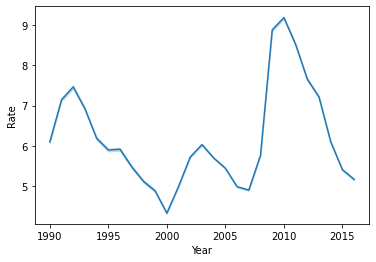

In [18]:
#shows the average unemployment rates from each year during the range 1990-2016
sns.lineplot(x = 'Year', y = 'Rate', data = unemployment_rates)

To begin, we plotted out the average unemployment rates over the selected year ranges to better understand at what period of time there was greater unemployment. From this we were able to visualize how in 2000 there was the lowest unemployment rates and in 2010 there was the greatest. At this point, based on our hypothesis we presume that 2000 would have the least amount of mass shootings and 2010 would have the greatest. This is what we further investigate. 

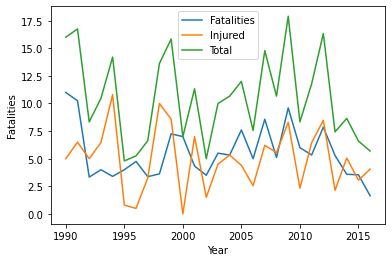

In [38]:
sns.lineplot(x = 'Year', y = 'Fatalities', ci = None, data = ms)
sns.lineplot(x = 'Year', y = 'Injured', ci = None, data = ms)
sns.lineplot(x = 'Year', y = 'Total', ci = None, data = ms)
plt.legend(labels = ['Fatalities', 'Injured', 'Total'])

Through this graph we are able to visualize the fatalities, injured, and the combined total. This graph allows us to see the effect the mass shooting had on the group of individuals that were present. From visualizing this data it shows that there was dip in 1995 and 2000 towards the amount of people that were harmed and a peak in 2010 as far as the same parameters. This could indicate that there is some sort of correlation with mass shootings and unemployment rate, but the next step is to see how many mass shootings are occurring during these time periods. 

<AxesSubplot:xlabel='Year', ylabel='count'>

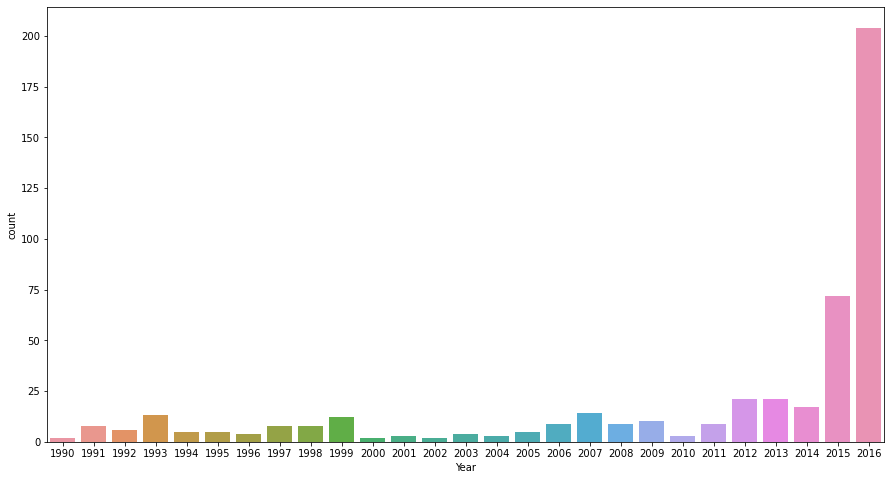

In [39]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Year', data = ms)

This plot indicates the amount of mass shootings that occur in each prospective year. There is a peak in 2016 which does not relate towards the unemployment rates that we were identifying earlier. There must be some confounding elements that need to be discovered. Additionally, it appears that there is a big jump in the number of mass shootings starting in 2015 and it grew rapidily in 2016 that appears to be an outlier in comparison to the remainder of the data. This is something that does not appear to be related to the unemployment rates regardless of the region that is occurs.

<AxesSubplot:>

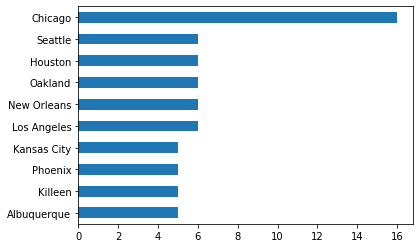

In [24]:
ms['City/County'].value_counts().nlargest(10).sort_values().plot(kind = 'barh')

<AxesSubplot:>

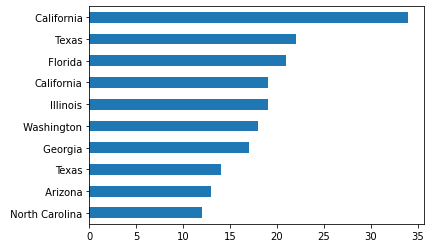

In [25]:
ms['State'].value_counts().nlargest(10).sort_values().plot(kind = 'barh')

These two graphs will allow us to analyze how many mass shootings occur based on the region (either City/County or State).